In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-india/diabetes.csv


In [2]:
df=pd.read_csv('/kaggle/input/pima-india/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df['Pregnancies'].isnull().any()

False

In [8]:
df['Pregnancies'].isnull().sum()

0

In [9]:
df1=df.copy()

In [10]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df1['Pregnancies'].replace(0,np.nan,inplace=True)

/tmp/ipykernel_17/1915412218.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Pregnancies'].replace(0,np.nan,inplace=True)


In [12]:
df1['Pregnancies'].isnull().any()

True

In [13]:
df1['Pregnancies'].isnull().sum()

111

In [14]:
df1.dtypes

Pregnancies                 float64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [15]:
col=df.columns[:-1].to_list()

In [16]:
col

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [17]:
for i in col:
    df1[i].replace(0,np.nan,inplace=True)

/tmp/ipykernel_17/3285664455.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[i].replace(0,np.nan,inplace=True)


In [18]:
df1.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [19]:
df1.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
for i in col:
    print(i,df1[i].mean())

Pregnancies 4.494672754946728
Glucose 121.6867627785059
BloodPressure 72.40518417462484
SkinThickness 29.153419593345657
Insulin 155.5482233502538
BMI 32.457463672391015
DiabetesPedigreeFunction 0.47187630208333325
Age 33.240885416666664


In [21]:
for i in col:
    df1[i].fillna(df1[i].mean(),inplace=True)

/tmp/ipykernel_17/3466413993.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[i].fillna(df1[i].mean(),inplace=True)


In [22]:
df1.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1.000000,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8.000000,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1.000000,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,4.494673,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5.000000,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3.000000,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10.000000,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2.000000,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8.000000,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

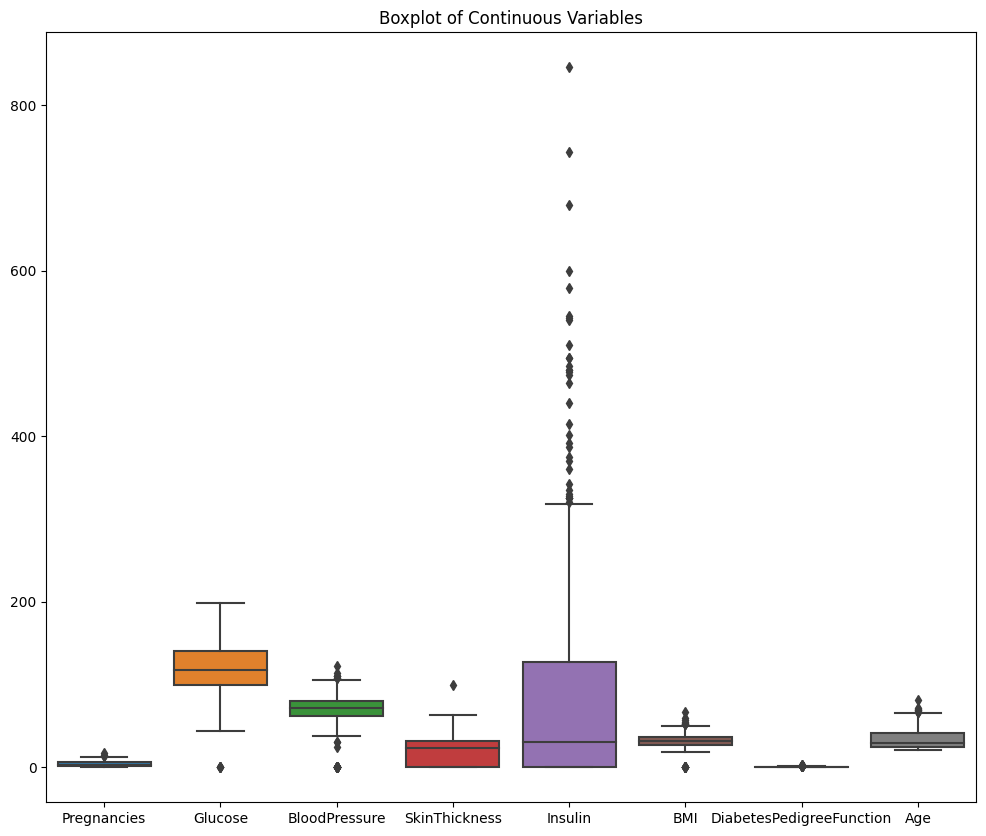

In [26]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df[col])
plt.title('Boxplot of Continuous Variables')
plt.show()

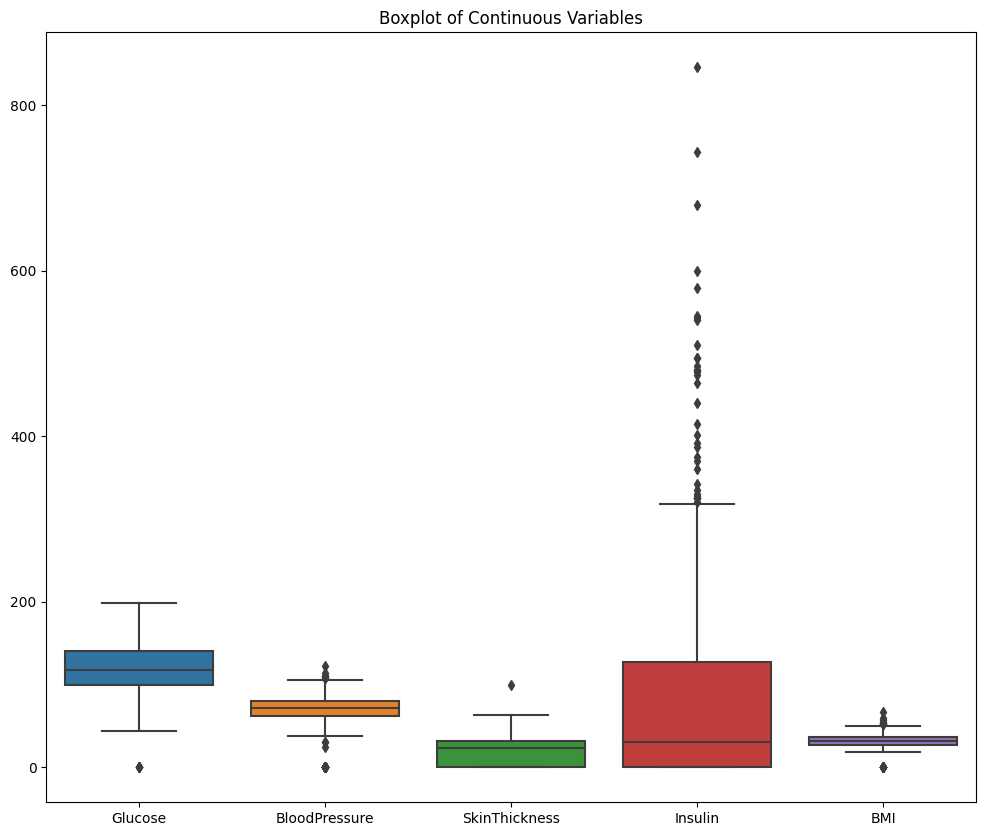

In [27]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])
plt.title('Boxplot of Continuous Variables')
plt.show()

In [28]:
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df[column]=np.where(df[column]<lower_bound,lower_bound,df[column])
    df[column]=np.where(df[column]>upper_bound,upper_bound,df[column])

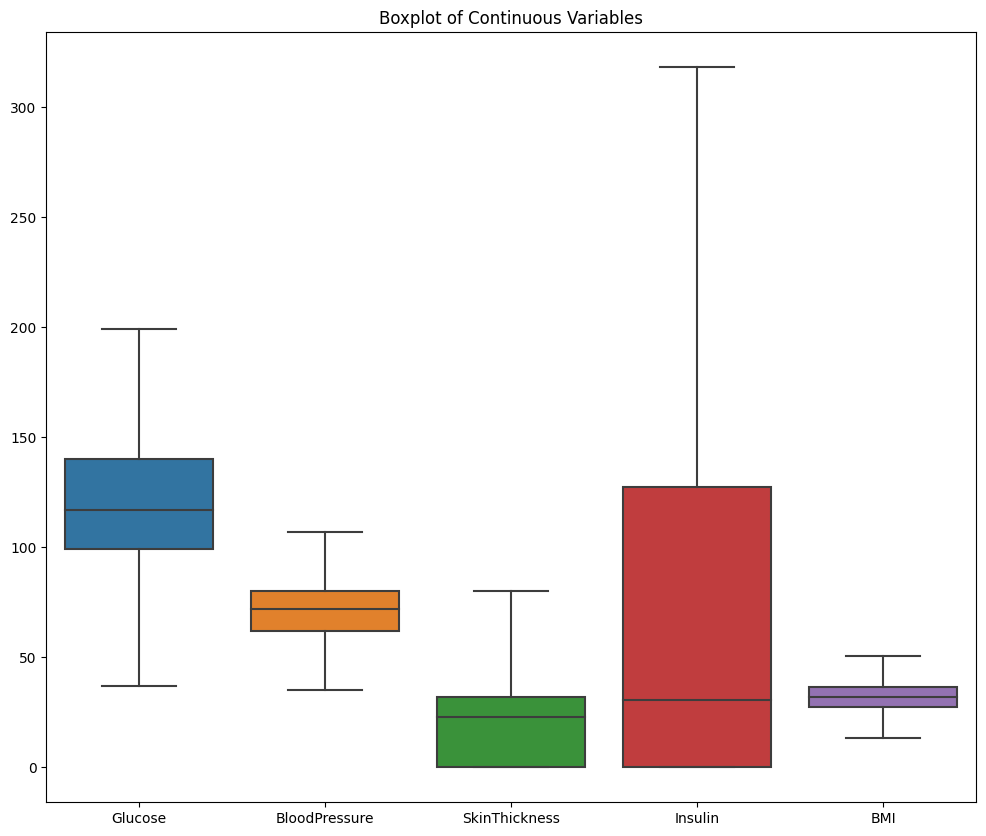

In [29]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])
plt.title('Boxplot of Continuous Variables')
plt.show()

In [30]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

df1['Glucose_Normalized']=scaler.fit_transform(df1[['Glucose']])

print("\nNormalized 'Glucose' values:\n", df1[['Glucose', 'Glucose_Normalized']].head())


Normalized 'Glucose' values:
    Glucose  Glucose_Normalized
0    148.0            0.670968
1     85.0            0.264516
2    183.0            0.896774
3     89.0            0.290323
4    137.0            0.600000


In [32]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Normalized
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,0.670968
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,0.264516
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,0.896774
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,0.290323
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,0.600000


In [33]:
X=df1.drop(['Outcome'],axis=1)

y=df1['Outcome']

In [34]:
X.drop(['Glucose'],axis=1)

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_Normalized
0,6.000000,72.0,35.00000,155.548223,33.6,0.627,50,0.670968
1,1.000000,66.0,29.00000,155.548223,26.6,0.351,31,0.264516
2,8.000000,64.0,29.15342,155.548223,23.3,0.672,32,0.896774
3,1.000000,66.0,23.00000,94.000000,28.1,0.167,21,0.290323
4,4.494673,40.0,35.00000,168.000000,43.1,2.288,33,0.600000
...,...,...,...,...,...,...,...,...
763,10.000000,76.0,48.00000,180.000000,32.9,0.171,63,0.367742
764,2.000000,70.0,27.00000,155.548223,36.8,0.340,27,0.503226
765,5.000000,72.0,23.00000,112.000000,26.2,0.245,30,0.496774
766,1.000000,60.0,29.15342,155.548223,30.1,0.349,47,0.529032


In [35]:
X.drop(['Glucose'],axis=1)

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_Normalized
0,6.000000,72.0,35.00000,155.548223,33.6,0.627,50,0.670968
1,1.000000,66.0,29.00000,155.548223,26.6,0.351,31,0.264516
2,8.000000,64.0,29.15342,155.548223,23.3,0.672,32,0.896774
3,1.000000,66.0,23.00000,94.000000,28.1,0.167,21,0.290323
4,4.494673,40.0,35.00000,168.000000,43.1,2.288,33,0.600000
...,...,...,...,...,...,...,...,...
763,10.000000,76.0,48.00000,180.000000,32.9,0.171,63,0.367742
764,2.000000,70.0,27.00000,155.548223,36.8,0.340,27,0.503226
765,5.000000,72.0,23.00000,112.000000,26.2,0.245,30,0.496774
766,1.000000,60.0,29.15342,155.548223,30.1,0.349,47,0.529032


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [38]:
pred=log_reg.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)
class_report = classification_report(y_test, pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7597402597402597
Confusion Matrix:
 [[82 17]
 [20 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154

